In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
   
def comp_int(a,b):
    return int(a) < int(b)

def comp_frac(a,b):
    return (a-int(a)) < (b - int(b))

def test_stabilite(algorithme):
    T = np.random.uniform(0,7,50)
    N = len(T)
    
    algorithme(T,comp_frac)
    algorithme(T,comp_int)
    plt.stem(T,markerfmt=',',linefmt='black',basefmt='black')

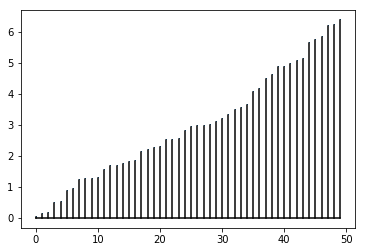

In [2]:
def tri_a_bulles(T,plus_petit):
    N = len(T)
    for k in range(N,1,-1): 
        for i in range(0,k-1):
            if plus_petit( T[i+1], T[i] ):
                T[i],T[i+1] = T[i+1],T[i]   
                
test_stabilite(tri_a_bulles)

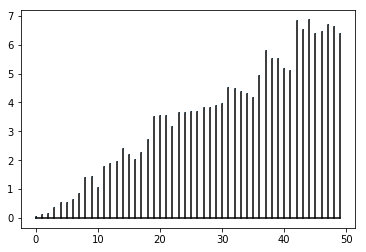

In [3]:
def tri_par_selection(T,plus_petit):
    N = len(T)
    for i in range(0,N-1):
        jMin = i
        for j in range(i+1,N):
            if plus_petit(T[j],T[jMin]):
                jMin = j
        T[jMin],T[i] = T[i],T[jMin]  
                
test_stabilite(tri_par_selection)

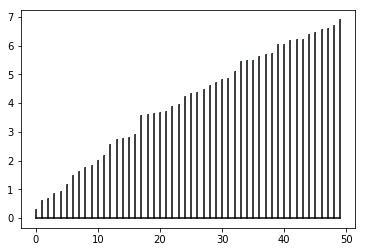

In [4]:
def tri_par_insertion(T,plus_petit):
    N = len(T)
    for i in range(1,N):
        j = i
        tmp = T[j]
        while j > 0 and plus_petit(tmp,T[j-1]):
            T[j] = T[j-1]
            j -= 1
        T[j] = tmp

test_stabilite(tri_par_insertion)

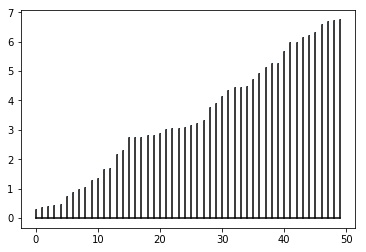

In [5]:
def Fusion(T1,T2,plus_petit): 
    T = []
    
    i1 = i2 = 0
    while i1 < len(T1) and i2 < len(T2):
        if not plus_petit(T2[i2],T1[i1]):
            T.append(T1[i1])
            i1 += 1
        else:
            T.append(T2[i2])
            i2 += 1

    for j in range(i1,len(T1)):
        T.append(T1[j])

    for j in range(i2,len(T2)):
        T.append(T2[j])
        
    return T

def TriFusion(T,plus_petit):  
    N = len(T)
    if N >= 2:
        milieu = int(N/2)
        T1 = TriFusion(T[0:milieu],plus_petit)
        T2 = TriFusion(T[milieu:N],plus_petit)
        T  = Fusion(T1,T2,plus_petit)
    return T

def tri_fusion(T,plus_petit):
    T2 = TriFusion(T,plus_petit)
    for i in range(len(T)):
        T[i] = T2[i]

test_stabilite(tri_fusion)

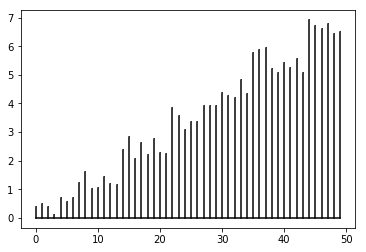

In [6]:
def Partition(T,lo,hi,plus_petit):    
    i = lo-1
    j = hi
    
    while True:
        while True:
            i += 1
            if not plus_petit(T[i],T[hi]):
                break
        while True:
            j -= 1
            if j < 0 or not plus_petit(T[hi],T[j]):
                break

        if j < i:
            break
            
        T[i],T[j] = T[j],T[i]
        
    T[i],T[hi] = T[hi],T[i]
        
    return i

def TriRapide(T,lo,hi,plus_petit):
    if lo < hi:
        pivot = hi;
        T[hi],T[pivot] = T[pivot],T[hi]
    
        pivot = Partition(T,lo,hi,plus_petit)
        TriRapide(T,lo,pivot-1,plus_petit)
        TriRapide(T,pivot+1,hi,plus_petit)
        
def tri_rapide(T,plus_petit):
    TriRapide(T,0,len(T)-1,plus_petit)
    
test_stabilite(tri_rapide)